In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp, odeint

In [2]:
M, m = 10, 1.5
_z, _t = 0.5, 1
eps, omega, beta = 0.2, 50, 10
q1, q2 = 0.2, 0.4
pi = np.math.pi

In [3]:
def A2(M=M, m=m):
    return 2 * pow(M, 2) / (1 + pow(m, 2))

def A(M=M, m=m):
    return np.sqrt(A2(M=M, m=m))

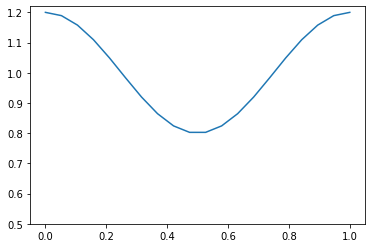

In [4]:
r1 = 0.5

@np.vectorize
def r2(z=_z, eps=eps):
    return 1 + eps * np.math.cos(2 * pi * z)

with plt.style.context('fast'):
    plt.plot(np.linspace(0, 1, 20), r2(z=np.linspace(0, 1, 20)))
    plt.ylim(bottom=0.5)

In [5]:
@np.vectorize
def q(t=_t, omega=omega, q1=q1, q2=q2):
    return q1 + q2 * np.math.sin(omega * t)

@np.vectorize
def dqdt(t=_t, omega=omega, q2=q2):
    return omega * q2 * np.math.cos(omega * t)

@np.vectorize
def dpdz(wr2, wr1, z=_z, t=_t, beta=beta, eps=eps, omega=omega, q1=q1, q2=q2, M=M, m=m):
    r2_r1 = np.math.pow(r2(z=z, eps=eps), 2) - np.math.pow(r1, 2)
    
    part_1 = beta * dqdt(t=t, omega=omega, q2=q2) / (pi * r2_r1)
    part_2 = A2(M=M, m=m) * q(t=t, omega=omega, q1=q1, q2=q2) / (2 * pi * r2_r1)
    part_3 = (r2(z) * wr2 - r1 * wr1) / r2_r1
    return -(part_1 + part_2 - part_3 + 1)

In [6]:
from PIL import Image

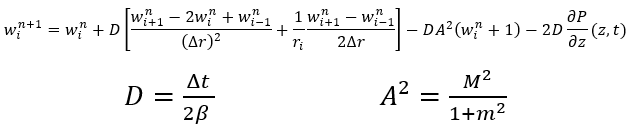

In [7]:
Image.open('newtonian-discretization-full.png')

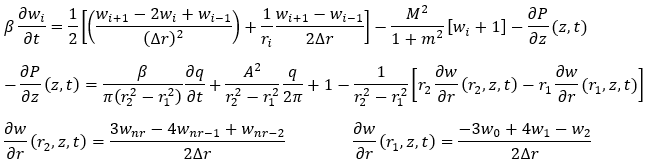

In [11]:
Image.open('newtonian-discretization.png')

In [303]:
_N = 50
def rhs(w, t, N=_N, z=_z, M=M, m=m, beta=beta, eps=eps):
    dwdt = np.zeros(N)
    w[0], w[-1] = -1, -1
    dr = (r2(z, eps) - r1) / N
    nr = N -1
    
    # first derivatives of w
    wr1 = (-3 * w[0] + 4 * w[1] - w[2]) / (2 * dr)
    wr2 = (3 * w[nr] - 4 * w[nr - 1] + w[nr - 2]) / (2 * dr)
    
    # main loop
    for i in range(1, N-1):
        wr1 = (-3 * w[0] + 4 * w[1] - w[2]) / (2 * dr)
        wr2 = (3 * w[nr] - 4 * w[nr - 1] + w[nr - 2]) / (2 * dr)
        wr = (w[i+1] - w[i-1]) / (2 * dr)
        wrr = (w[i+1] - 2 * w[i] + w[i-1]) / (dr ** 2)
        r = i * dr + 0.5
        part_1 = 0.5 * (wrr + wr / r)
        part_2 = A2(M=M, m=m) * (w[i] + 1) / 2
        part_3 = dpdz(wr2, wr1, z=z, t=t, eps=eps)
        dwdt[i] = part_1 - part_2 - part_3
        dwdt[i] /= beta
    return dwdt

In [55]:
def solver_default(t, w):
    return rhs(w, t)

w0 = np.ones(_N)
w0 *= -1

s_default = solve_ivp(solver_default, (0, 1), w0)
# t_default = np.linspace(0, 1, 30)
# s_default = odeint(rhs, w0, t_default)
df_default = pd.DataFrame(s_default.y)
df_default.head(2)

0         1         2        3         4         5         6         7    \
0 -1.0 -1.000000 -1.000000 -1.00000 -1.000000 -1.000000 -1.000000 -1.000000   
1 -1.0 -0.972071 -0.946911 -0.92271 -0.901874 -0.881752 -0.862069 -0.843432   

        8        9    ...         593         594         595         596  \
0 -1.000000 -1.00000  ...   -1.000000   -1.000000   -1.000000   -1.000000   
1 -0.826182 -0.81006  ...  138.783372  140.324495  141.902182  143.736869   

         597         598         599         600         601         602  
0   -1.00000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000  
1  145.78622  147.416135  149.082722  151.007828  153.148153  154.779548  

[2 rows x 603 columns]

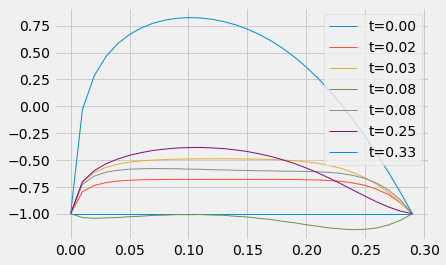

In [102]:
def get_t(t):
    return f'{s_default.t[t]:.2f}'
with plt.style.context('fivethirtyeight'):
#     for i in range(3):
#         t = s_default.t[i * 50]
#         plt.plot(r_s, df_default.iloc[:, i * 50], linewidth=1, label=f't={t:.2f}')
    plt.plot(r_s, df_default.iloc[:, 0], linewidth=1, label=f't={get_t(0)}')
    plt.plot(r_s, df_default.iloc[:, 10], linewidth=1, label=f't={get_t(10)}')
    plt.plot(r_s, df_default.iloc[:, 20], linewidth=1, label=f't={get_t(20)}')
    plt.plot(r_s, df_default.iloc[:, 50], linewidth=1, label=f't={get_t(50)}')
    plt.plot(r_s, df_default.iloc[:, 80], linewidth=1, label=f't={get_t(50)}')
#     plt.plot(r_s, df_default.iloc[:, 100], linewidth=1, label=f't={get_t(100)}')
    plt.plot(r_s, df_default.iloc[:, 120], linewidth=1, label=f't={get_t(150)}')
    plt.plot(r_s, df_default.iloc[:, 200], linewidth=1, label=f't={get_t(200)}')
#     plt.plot(r_s, df_default.iloc[:, 250], linewidth=1, label=f't={t:.2f}')
    plt.legend()

In [173]:
w0 = np.ones(_N)
w0 *= -1

s_default_50 = solve_ivp(solver_default, (0, 1), w0)
df_default_50 = pd.DataFrame(s_default.y)
df_default_50.head(2)

0         1         2        3         4         5         6         7    \
0 -1.0 -1.000000 -1.000000 -1.00000 -1.000000 -1.000000 -1.000000 -1.000000   
1 -1.0 -0.972071 -0.946911 -0.92271 -0.901874 -0.881752 -0.862069 -0.843432   

        8        9    ...         593         594         595         596  \
0 -1.000000 -1.00000  ...   -1.000000   -1.000000   -1.000000   -1.000000   
1 -0.826182 -0.81006  ...  138.783372  140.324495  141.902182  143.736869   

         597         598         599         600         601         602  
0   -1.00000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000  
1  145.78622  147.416135  149.082722  151.007828  153.148153  154.779548  

[2 rows x 603 columns]

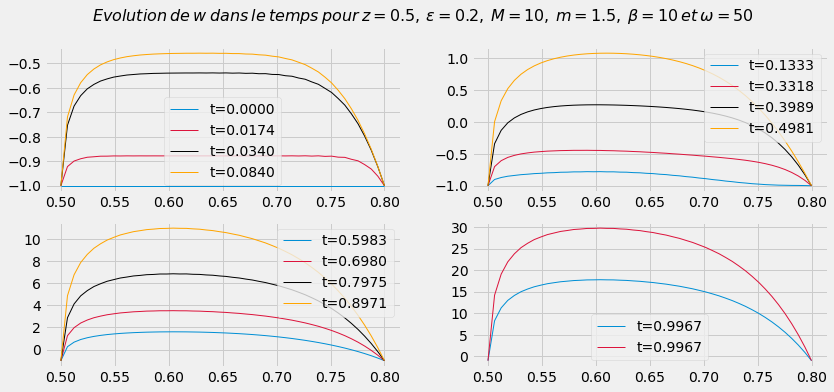

In [155]:
df_default_50 = pd.DataFrame(s_default_50.y)
df_default_50.head(2)

def get_t(t):
    return f'{s_default.t[t]:.4f}'

with plt.style.context('fivethirtyeight'):
    r_s = np.linspace(0.5, 0.8, 50)
    sp = r'\hspace{0.2}'
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
    fig.set_size_inches(12.5, 5.5)
    fig.suptitle(fr'$Evolution{sp}de{sp}w{sp}dans{sp}le{sp}temps{sp}pour{sp}z=0.5,{sp}\epsilon=0.2,{sp}M=10,{sp}m=1.5,{sp}\beta=10{sp}et{sp}\omega=50$', fontsize=16)
    
    # ax1
    ax1.plot(r_s, df_default_50.iloc[:, 0], linewidth=1, label=f't={get_t(0)}')
    ax1.plot(r_s, df_default_50.iloc[:, 10], linewidth=1, label=f't={get_t(10)}', color='crimson')
    ax1.plot(r_s, df_default_50.iloc[:, 40], linewidth=1, label=f't={get_t(20)}', color='black')
    ax1.plot(r_s, df_default_50.iloc[:, 50], linewidth=1, label=f't={get_t(50)}', color='orange')
    ax1.legend()
    
    ax2.plot(r_s, df_default_50.iloc[:, 80 * 2], linewidth=1, label=f't={get_t(80)}')
    ax2.plot(r_s, df_default_50.iloc[:, 100 * 2], linewidth=1, label=f't={get_t(200)}', color='crimson')
    ax2.plot(r_s, df_default_50.iloc[:, 120 * 2], linewidth=1, label=f't={get_t(240)}', color='black')
    ax2.plot(r_s, df_default_50.iloc[:, 150 * 2], linewidth=1, label=f't={get_t(300)}', color='orange')
    ax2.legend()
    
    ax3.plot(r_s, df_default_50.iloc[:, 120 * 3], linewidth=1, label=f't={get_t(120 * 3)}')
    ax3.plot(r_s, df_default_50.iloc[:, 140 * 3], linewidth=1, label=f't={get_t(140 * 3)}', color='crimson')
    ax3.plot(r_s, df_default_50.iloc[:, 160 * 3], linewidth=1, label=f't={get_t(160 * 3)}', color='black')
    ax3.plot(r_s, df_default_50.iloc[:, 180 * 3], linewidth=1, label=f't={get_t(180 * 3)}', color='orange')
    ax3.legend()
    
    ax4.plot(r_s, df_default_50.iloc[:, 200 * 3], linewidth=1, label=f't={get_t(200 * 3)}')
    ax4.plot(r_s, df_default_50.iloc[:, 220 * 3], linewidth=1, label=f't={get_t(200 * 3)}', color='crimson')
#     ax4.plot(r_s, df_default_50.iloc[:, 240 * 3], linewidth=1, label=f't={get_t(240 * 3)}', color='black')
#     ax4.plot(r_s, df_default_50.iloc[:, 260 * 3], linewidth=1, label=f't={get_t(260 * 3)}', color='orange')
    ax4.legend()

In [157]:
w0 = np.ones(_N)
w0 *= -1

s_default_50_2 = solve_ivp(solver_default, (0, 1), w0)

AttributeError: y_2

In [158]:
df_default_50_2 = pd.DataFrame(s_default_50_2.y)
df_default_50_2.head(2)

0         1        2         3         4         5         6         7     \
0  -1.0 -1.000000 -1.00000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
1  -1.0 -0.991258 -0.98548 -0.981288 -0.977545 -0.974306 -0.971352 -0.968617   

       8        9     ...      1668      1669      1670      1671      1672  \
0 -1.000000 -1.00000  ... -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
1 -0.966065 -0.96366  ... -0.975199 -0.972941 -0.970954 -0.969173 -0.967306   

       1673      1674      1675      1676      1677  
0 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000  
1 -0.965185 -0.962903 -0.961101 -0.959296 -0.959246  

[2 rows x 1678 columns]

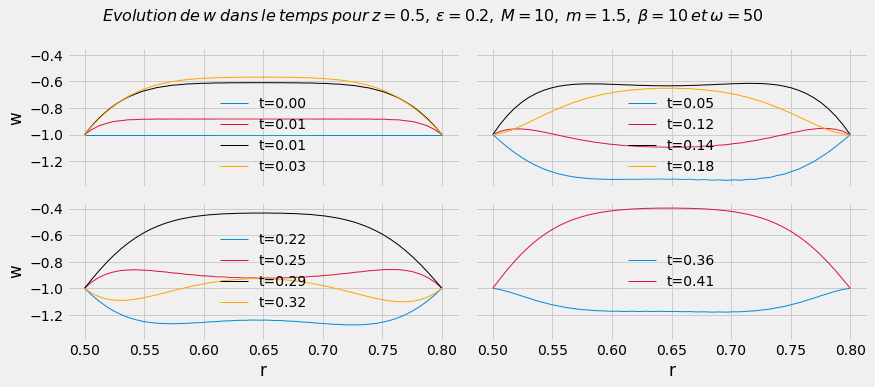

In [298]:
df_default_50 = pd.DataFrame(s_default_50.y)
df_default_50.head(2)

def get_t(t):
    return f'{s_default_50.t[t]:.2f}'

with plt.style.context('fivethirtyeight'):
    r_s = np.linspace(0.5, 0.8, 50)
    sp = r'\hspace{0.2}'
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
    fig.set_size_inches(12.5, 5.5)
    fig.suptitle(fr'$Evolution{sp}de{sp}w{sp}dans{sp}le{sp}temps{sp}pour{sp}z=0.5,{sp}\epsilon=0.2,{sp}M=10,{sp}m=1.5,{sp}\beta=10{sp}et{sp}\omega=50$', fontsize=16)
    
    # ax1
    ax1.plot(r_s, df_default_50_2.iloc[:, 0], linewidth=1, label=f't={get_t(0)}')
    ax1.plot(r_s, df_default_50_2.iloc[:, 10], linewidth=1, label=f't={get_t(10)}', color='crimson')
    ax1.plot(r_s, df_default_50_2.iloc[:, 40], linewidth=1, label=f't={get_t(20)}', color='black')
    ax1.plot(r_s, df_default_50_2.iloc[:, 50], linewidth=1, label=f't={get_t(50)}', color='orange')
    ax1.legend(framealpha=0.1)
    ax1.set_ylabel('w')
    
    ax2.plot(r_s, df_default_50_2.iloc[:, 80 * 2], linewidth=1, label=f't={get_t(80)}')
    ax2.plot(r_s, df_default_50_2.iloc[:, 100 * 2], linewidth=1, label=f't={get_t(200)}', color='crimson')
    ax2.plot(r_s, df_default_50_2.iloc[:, 120 * 2], linewidth=1, label=f't={get_t(240)}', color='black')
    ax2.plot(r_s, df_default_50_2.iloc[:, 150 * 2], linewidth=1, label=f't={get_t(300)}', color='orange')
    ax2.legend(framealpha=0.1)
    
    ax3.plot(r_s, df_default_50_2.iloc[:, 120 * 3], linewidth=1, label=f't={get_t(120 * 3)}')
    ax3.plot(r_s, df_default_50_2.iloc[:, 140 * 3], linewidth=1, label=f't={get_t(140 * 3)}', color='crimson')
    ax3.plot(r_s, df_default_50_2.iloc[:, 160 * 3], linewidth=1, label=f't={get_t(160 * 3)}', color='black')
    ax3.plot(r_s, df_default_50_2.iloc[:, 180 * 3], linewidth=1, label=f't={get_t(180 * 3)}', color='orange')
    ax3.legend(framealpha=0.1)
    ax3.set_xlabel('r')
    ax3.set_ylabel('w')
    
    ax4.plot(r_s, df_default_50_2.iloc[:, 200 * 3], linewidth=1, label=f't={get_t(200 * 3)}')
    ax4.plot(r_s, df_default_50_2.iloc[:, 230 * 3], linewidth=1, label=f't={get_t(230 * 3)}', color='crimson')
#     ax4.plot(r_s, df_default_50_2.iloc[:, 240 * 3], linewidth=1, label=f't={get_t(240 * 3)}', color='black')
#     ax4.plot(r_s, df_default_50_2.iloc[:, 260 * 3], linewidth=1, label=f't={get_t(260 * 3)}', color='orange')
    ax4.legend(framealpha=0.1)
    ax4.set_xlabel('r')
    
    plt.tight_layout()
#     plt.savefig('figs/newtonian-unsteady-4-t-evolution.png', transparent=True)

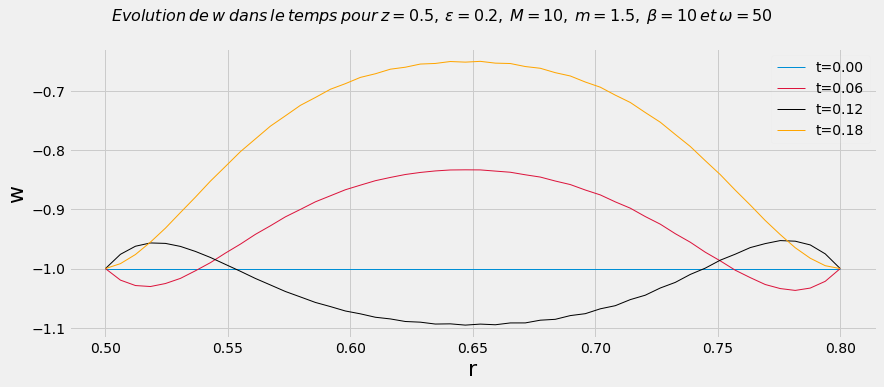

In [296]:
with plt.style.context('fivethirtyeight'):
    r_s = np.linspace(0.5, 0.8, 50)
    sp = r'\hspace{0.2}'
    fig = plt.gcf()
    fig.set_size_inches(12.5, 5.5)
    fig.suptitle(fr'$Evolution{sp}de{sp}w{sp}dans{sp}le{sp}temps{sp}pour{sp}z=0.5,{sp}\epsilon=0.2,{sp}M=10,{sp}m=1.5,{sp}\beta=10{sp}et{sp}\omega=50$', fontsize=16)
    
    plt.xlabel('r', fontsize=22)
    plt.ylabel('w', fontsize=22)
    
    # ax1
    plt.plot(r_s, df_default_50_2.iloc[:, 0], linewidth=1, label=f't={get_t(0)}')
    plt.plot(r_s, df_default_50_2.iloc[:, 100], linewidth=1, label=f't={get_t(100)}', color='crimson')
    plt.plot(r_s, df_default_50_2.iloc[:, 200], linewidth=1, label=f't={get_t(200)}', color='black')
    plt.plot(r_s, df_default_50_2.iloc[:, 300], linewidth=1, label=f't={get_t(300)}', color='orange')
    plt.legend(framealpha=0.1)
    plt.tight_layout()
#     plt.savefig('figs/newtonian-unsteady-time-evolution.png', transparent=True)

In [170]:
def solver_hartmann_1(t, w):
    return rhs(w, t, M=1)

s_hartmann_1 = solve_ivp(solver_hartmann_1, (0, 1), w0)

In [178]:
df_hartmann_1 = pd.DataFrame(s_hartmann_1.y)
df_hartmann_1.head(2)

0         1         2         3         4         5         6         7     \
0  -1.0 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
1  -1.0 -0.991236 -0.985444 -0.981229 -0.977456 -0.974185 -0.971197 -0.968423   

      8         9     ...      1667      1668      1669      1670     1671  \
0 -1.00000 -1.000000  ... -1.000000 -1.000000 -1.000000 -1.000000 -1.00000   
1 -0.96583 -0.963383  ... -0.928041 -0.925915 -0.923645 -0.921487 -0.91957   

       1672      1673      1674     1675      1676  
0 -1.000000 -1.000000 -1.000000 -1.00000 -1.000000  
1 -0.917722 -0.915715 -0.913495 -0.91127 -0.911218  

[2 rows x 1677 columns]

In [183]:
def solver_hartmann_20(t, w):
    return rhs(w, t, M=20)

s_hartmann_20 = solve_ivp(solver_hartmann_20, (0, 1), w0)

In [190]:
df_hartmann_20 = pd.DataFrame(s_hartmann_20.y)
df_hartmann_20.head(2)

0         1         2         3         4         5         6         7     \
0  -1.0 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
1  -1.0 -0.991324 -0.985591 -0.981466 -0.977813 -0.974667 -0.971815 -0.969194   

       8         9     ...      1670      1671      1672      1673      1674  \
0 -1.000000 -1.000000  ... -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
1 -0.966762 -0.964479  ... -0.985892 -0.984087 -0.982271 -0.980192 -0.977914   

       1675      1676     1677     1678      1679  
0 -1.000000 -1.000000 -1.00000 -1.00000 -1.000000  
1 -0.976125 -0.974335 -0.97231 -0.97012 -0.969009  

[2 rows x 1680 columns]

In [213]:
def solver_hartmann_50(t, w):
    return rhs(w, t, M=50)

s_hartmann_50 = solve_ivp(solver_hartmann_50, (0, 1), w0)

In [214]:
df_hartmann_50 = pd.DataFrame(s_hartmann_50.y)
df_hartmann_50.head(2)

0         1         2         3         4         5         6         7     \
0  -1.0 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
1  -1.0 -0.991748 -0.986331 -0.982632 -0.979558 -0.976984 -0.974749 -0.972797   

       8         9     ...      1690      1691      1692      1693      1694  \
0 -1.000000 -1.000000  ... -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
1 -0.971051 -0.969454  ... -0.969822 -0.968793 -0.967774 -0.966633 -0.965412   

       1695      1696      1697      1698      1699  
0 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000  
1 -0.964477 -0.963557 -0.962536 -0.961453 -0.961335  

[2 rows x 1700 columns]

In [265]:
def solver_hartmann_0(t, w):
    return rhs(w, t, M=0)

s_hartmann_0 = solve_ivp(solver_hartmann_0, (0, 1), w0)

In [266]:
df_hartmann_0 = pd.DataFrame(s_hartmann_0.y)
df_hartmann_0.head(2)

0         1         2         3         4         5         6         7     \
0  -1.0 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
1  -1.0 -0.991236 -0.985443 -0.981229 -0.977455 -0.974184 -0.971195 -0.968421   

       8         9     ...      1666      1667      1668      1669      1670  \
0 -1.000000 -1.000000  ... -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
1 -0.965828 -0.963381  ... -0.928742 -0.926616 -0.924342 -0.922181 -0.920262   

       1671      1672      1673      1674      1675  
0 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000  
1 -0.918412 -0.916399 -0.914167 -0.911928 -0.910089  

[2 rows x 1676 columns]

In [273]:
def solver_hartmann_5(t, w):
    return rhs(w, t, M=5)

s_hartmann_5 = solve_ivp(solver_hartmann_5, (0, 1), w0)

In [274]:
df_hartmann_5 = pd.DataFrame(s_hartmann_5.y)
df_hartmann_5.head(2)

0         1         2         3         4         5         6        7     \
0  -1.0 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.00000   
1  -1.0 -0.991241 -0.985453 -0.981244 -0.977477 -0.974215 -0.971235 -0.96847   

       8         9     ...      1667      1668      1669      1670      1671  \
0 -1.000000 -1.000000  ... -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
1 -0.965888 -0.963451  ... -0.949263 -0.947401 -0.945276 -0.942955 -0.941089   

       1672     1673      1674      1675      1676  
0 -1.000000 -1.00000 -1.000000 -1.000000 -1.000000  
1 -0.939218 -0.93711 -0.934834 -0.932989 -0.932449  

[2 rows x 1677 columns]

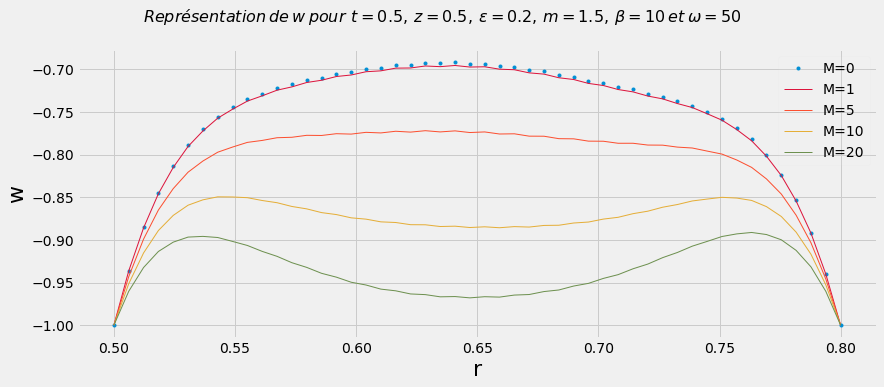

In [299]:
with plt.style.context('fivethirtyeight'):
    r_s = np.linspace(0.5, 0.8, 50)
    sp = r'\hspace{0.2}'
    fig = plt.gcf()
    fig.set_size_inches(12.5, 5.5)
    fig.suptitle(fr'$Représentation{sp}de{sp}w{sp}pour{sp}{sp}t=0.5,{sp}z=0.5,{sp}\epsilon=0.2,{sp}m=1.5,{sp}\beta=10{sp}et{sp}\omega=50$', fontsize=16)
    
    # ax1
    plt.plot(r_s, df_hartmann_0.iloc[:, 837], linewidth=1, label='M=0', marker='.', linestyle='None')
    plt.plot(r_s, df_hartmann_1.iloc[:, 837], linewidth=1, label='M=1', color='crimson')
    plt.plot(r_s, df_hartmann_5.iloc[:, 837], linewidth=1, label='M=5')
    plt.plot(r_s, df_default_50_2.iloc[:, 839], linewidth=1, label='M=10')
    plt.plot(r_s, df_hartmann_20.iloc[:, 839], linewidth=1, label='M=20')
#     plt.plot(r_s, df_hartmann_50.iloc[:, 850], linewidth=1, label='M=50', color='black')
  
    plt.xlabel('r', fontsize=22)
    plt.ylabel('w', fontsize=22)
    plt.legend(framealpha=0.1)
    plt.tight_layout()
    
    plt.savefig('figs/newtonian-unsteady-hartmann-t0.5.png', transparent=True)

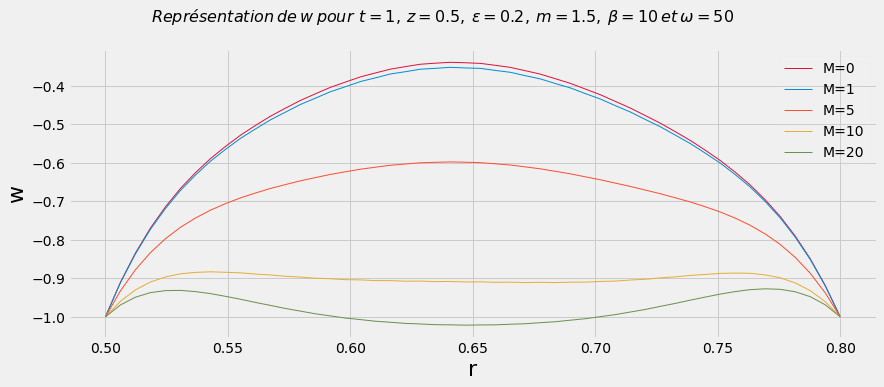

In [300]:
with plt.style.context('fivethirtyeight'):
    r_s = np.linspace(0.5, 0.8, 50)
    sp = r'\hspace{0.2}'
    fig = plt.gcf()
    fig.set_size_inches(12.5, 5.5)
    fig.suptitle(fr'$Représentation{sp}de{sp}w{sp}pour{sp}{sp}t=1,{sp}z=0.5,{sp}\epsilon=0.2,{sp}m=1.5,{sp}\beta=10{sp}et{sp}\omega=50$', fontsize=16)
    
    # ax1
    plt.plot(r_s, df_hartmann_0.iloc[:, 1675], linewidth=1, label='M=0', color='crimson')
    plt.plot(r_s, df_hartmann_1.iloc[:, 1676], linewidth=1, label='M=1')
    plt.plot(r_s, df_hartmann_5.iloc[:, 1676], linewidth=1, label='M=5')
    plt.plot(r_s, df_default_50_2.iloc[:, 1677], linewidth=1, label='M=10')
    plt.plot(r_s, df_hartmann_20.iloc[:, 1679], linewidth=1, label='M=20')
#     plt.plot(r_s, df_hartmann_50.iloc[:, 1699], linewidth=1, label='M=50', color='black')

    plt.xlabel('r', fontsize=22)
    plt.ylabel('w', fontsize=22)
    plt.legend(framealpha=0.1)
    plt.tight_layout()
    
    plt.savefig('figs/newtonian-unsteady-hartmann-t1.png', transparent=True)

In [305]:
def solver_occlusion_1(t, w):
    return rhs(w, t, eps=0.1)

s_occlusion_1 = solve_ivp(solver_occlusion_1, (0, 1), w0)

In [306]:
df_occlusion_1 = pd.DataFrame(s_occlusion_1.y)
df_occlusion_1.head(2)

0         1         2         3         4         5         6         7    \
0 -1.0 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
1 -1.0 -0.989387 -0.982315 -0.977099 -0.972702 -0.968872 -0.965403 -0.962321   

        8         9    ...       934       935       936       937       938  \
0 -1.000000 -1.000000  ... -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
1 -0.959534 -0.956948  ... -0.992257 -0.989421 -0.986552 -0.983296 -0.979761   

        939       940       941       942       943  
0 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000  
1 -0.976883 -0.974002 -0.970786 -0.967346 -0.965621  

[2 rows x 944 columns]

In [358]:
def solver_occlusion_15(t, w):
    return rhs(w, t, eps=0.15)

s_occlusion_15 = solve_ivp(solver_occlusion_15, (0, 1), w0)

In [359]:
df_occlusion_15 = pd.DataFrame(s_occlusion_15.y)
df_occlusion_15.head(2)

0         1         2         3         4         5         6         7     \
0  -1.0 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
1  -1.0 -0.989911 -0.983828 -0.979146 -0.975025 -0.971489 -0.968215 -0.965226   

       8         9     ...      1223      1224      1225      1226     1227  \
0 -1.000000 -1.000000  ... -1.000000 -1.000000 -1.000000 -1.000000 -1.00000   
1 -0.962506 -0.959926  ... -0.983792 -0.981421 -0.978755 -0.975878 -0.97351   

      1228      1229      1230      1231      1232  
0 -1.00000 -1.000000 -1.000000 -1.000000 -1.000000  
1 -0.97114 -0.968506 -0.965693 -0.963374 -0.962818  

[2 rows x 1233 columns]

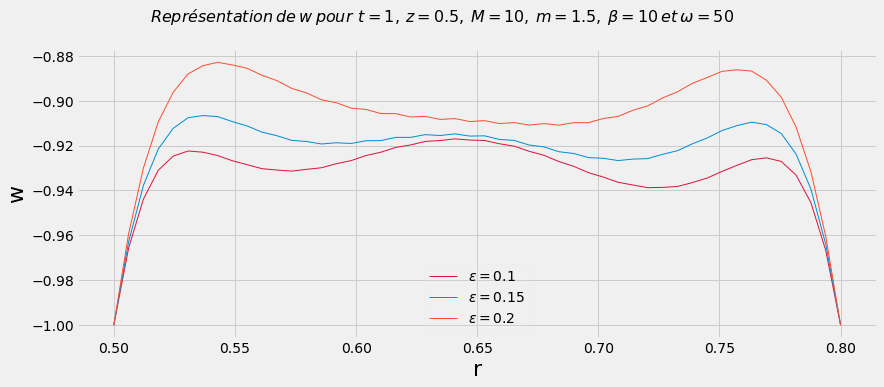

In [363]:
with plt.style.context('fivethirtyeight'):
    r_s = np.linspace(0.5, 0.8, 50)
    sp = r'\hspace{0.2}'
    fig = plt.gcf()
    fig.set_size_inches(12.5, 5.5)
    fig.suptitle(fr'$Représentation{sp}de{sp}w{sp}pour{sp}{sp}t=1,{sp}z=0.5,{sp}M=10,{sp}m=1.5,{sp}\beta=10{sp}et{sp}\omega=50$', fontsize=16)
    
    # ax1
    plt.plot(r_s, df_occlusion_1.iloc[:, 943], linewidth=1, label=r'$\epsilon=0.1$', color='crimson')
    plt.plot(r_s, df_occlusion_15.iloc[:, 1232], linewidth=1, label=r'$\epsilon=0.15$')
    plt.plot(r_s, df_default_50_2.iloc[:, 1677], linewidth=1, label=r'$\epsilon=0.2$')

    plt.xlabel('r', fontsize=22)
    plt.ylabel('w', fontsize=22)
    plt.legend(framealpha=0.1)
    plt.tight_layout()
    
    plt.savefig('figs/newtonian-unsteady-occlusion.png', transparent=True)